적대적 훈련을 소개, 점차 복잡한 GAN을 구성해본다. 

처음엔 간단한 1010 패턴에 대해 알어보고, 손으로 쓴 단색 숫자 이미지를 거쳐 마지막으로 풀컬러 얼굴 이미지로 학습한다.

## Chapter 5 GAN 개념

### 이미지 생성하기

신경망은 기본적으로 정보를 감소, 정제, 축약하는데 사용된다. MNIST classifier에서는 784개 값을 입력으로 받아 10개의 출력으로 변환하였는데 처음보다 정보량이 감소하였다.

반대로 MNIST classifier의 네트워크를 반대로 뒤집는다면, 이는 값을 감소시키는 것이 아닌 사이즈가 큰 데이터로 변환하는 것일 것이다. 이경우에는 Label을 주면 신경망을 통해 이미지가 생성되는 것이다. 

하나의 숫자를 표현하는 one-hot encoding vector를 이미 훈련된 네트워크에 넣어서 그 숫자에 맞는 이상적인 이미지를 거꾸로 만드는 것을 **백쿼리(역질의, backquery)** 라고 부른다.

백쿼리를 통해 만들어진 이미지의 특징

- 같은 one-hot encoding vector면 같은 결과를 출력

- 그 label을 나타내는 모든 훈련 데이터의 뭔가 평균적인 이미지가 나온다.

네트워크 모델을 이용해 원하는 이상적인 결과

- 각각 서로 다른 이미지를 만들어낸다.

- 평균처럼 애매모호한 이미지가 아니라 훈련 샘플처럼 보이는 이미지를 만든다.

위 두 가지 목표를 달성하는 것은 **사실적**이고 그럴듯한 이미지 생성에 중요
(간단한 백쿼리로는 이 목적을 달성 불가, 다른 네트워크 구조 필요)

### 적대적 훈련

2014년 굿펠로는 다른 종류의 네트워크 구조를 발표, 기존의 크거나, 넓거나, 깊은 신경망 버전도 아니고 당시 유행하는 활성화 함수나 진보한 최적화 기법을 사용한 것도 아니였다.

구조적으로 다른 신경망을 발표

진짜 고양이 사진인지 아니면 손으로 그린 만화 고양이인지 분류하는 경우를 생각해 보면 신경망은 종류가 서로 다른 두 이미지를 분류하도록 훈련할 것이다. 

분류기를 일종의 "탐정"이라고 생각하면 된다. 훈련 전에는 탐정은 주어진 이미지가 진짜 고양이인지 가짜 고양이인지 정확하게 가려낼 수 없다. 하지만 훈련을 거듭하면 실제 고양이와 가짜 고양이를 잘 구별할 수 있다. 

다음으로 가짜 이미지를 생성해주는 장치가 있다면 가짜 이미지를 준비하는 과정이 필요없다. 
고양이처럼 안 보이는 조잡한 이미지를 만들어내는 것은 어렬운 일이 아니다. 예를 들면 임의로 대충 삼각형 같은 것을 그려도 되기 때문이다. 이 경우 탐정은 쉽게 이를 분류할 수 있을 것이다. 

하지만, 대충 이미지를 만드는 생성기가 아니라 진짜 그럴듯한 이미지를 생성하는 신경망을 상상해보자. 이를 **생성기(generator)** 라고 부른다.

그리고 분류기는 **판별기(Discriminator)** 라고 부른다.

생성기, 판별기는 이러한 구조의 네트워크 모델에서 관습적으로 불리는 이름들이다.

그럴듯한 이미지를 만드는 신경망인 **생성기** 를 어떻게 훈련할까?

훈련 과정은 어떻게 보상을 주고 어떻게 벌을 줄지 대한 과정이다. **손실함수** 가 그 역할을 한다. 

- 판별기(Discriminator)를 무사히 속이면 생성기에게 보상을 준다.

- 판별기에 잡히면 생성기에 벌을 준다.

(판별기의 결과에 따라 생성기에게 보상과 벌을 준다.)

다시 정리하면, 생성기는 그럴듯한 이미지를 만드는 것이고 판별기는 생성기가 생성한 가짜 이미지와 진짜 이미지를 구분하는 것이다.

생성기의 성능이 좋지 않다면, 판별기가 쉽게 판단할 것이다. 하지만 생성기를 계속 훈련시키면 점차 진짜와 별 구분이 안되는 이미지를 만들어낼 것이다. 

판별기가 훈련을 통해 성능이 좋아질수록 생성기 역시 보상과 벌을 통해 훈련이 되어 성능이 좋아질 것이다. **궁극적으로 생성기는 진짜 이미지와 분간이 어려운 이미지를 만들기 시작할 것이다.**

이렇게 판별기와 생성기는 서로 적대적 관계로 경쟁을 하게 되며, 서로를 뛰어넘으려고 노력하기에 결과적으로 둘 다 성능이 좋아지게 된다. 이러한 구조를 **생성적 적대 신경망(Generative Adversarial Network), GAN이다.**

**단순히 경쟁을 통해 발전을 한다는 아이디어가 좋은게 아니라, 진짜 이미지를 판별하기 위해 어떤 방식을 따르고 어떤 손실함수를 거쳐야 하는지 등 자세하게 설정하지 않아도 된다는 것이다.** 


### GAN 훈련

**GAN은 생성기와 판별기를 모두 훈련한다.** 

**주의**할 것은 둘 중 하나만 먼저 훈련하고 같은 데이터로 다시 한번 다른 모델을 훈련하는 것은 하면 안된다. 제대로 훈련하기 위해서는 둘 모두 동시에 훈련시키면서 양쪽 모두 비슷한 수준으로 훈련이 이뤄지게 유도해야한다.


**GAN 핵심 훈련 방법**
- 1단계: 판별기에 실제 데이터를 보여주고 1.0이라는 값이어야 한다고 알려준다.
- 2단계: 판별기에 생성기로부터 만들어진 가짜 데이터를 보여주고 0.0이어야 한다고 알려준다.
- 3단계: 판별기에 생성기의 결과를 보여주고, 생성기에 결과가 1.0이어야 한다고 알려준다.

1단계:

**실제 데이터에서 나온 이미지**를 **판별기**에게 보여주고 분류한다. 결과는 1.0이 되어야 하고, 오차가 발생하면 **이를 판별기를 업데이트하는데 사용한다.**

2 단계:

판별기를 훈련하지만, **생성기에서 나온 이미지**를 보여준다. 결과는 0.0이어야 한다. 그리고 오차를 통해 **판별기만 업데이트한다.** 생성기를 업데이트하면 안된다. 

3 단계:

**생성기를 훈련**한다. 생성기는 판별기가 분류할 이미지를 생성하는 역할을 하고, 목적은 만든 이미지에 대해 판별기의 결과가 1.0이 되도록 하는 것이다. 즉 생성기가 판별기를 속여 진짜처럼 분류하게 하는 것이다. **오차는 생성기만을 업데이트**하는 데 사용된다.


### 훈련하기 어려운 GAN

실전에서 GAN을 훈련하는 것은 까다로울 수 있다. 생성기와 판별기가 서로 적대적인 관계로 발전했을 때, 두 개의 성능의 **균형**이 중요하다. 한쪽의 성능이 너무 빨리 좋아지면 다른 한쪽이 이를 따라잡지 못할 수 있다. 

GAN은 머신러닝에서 상당히 새로운 학습 방법이다. 제대로 학습이 이뤄지는 건지, 혹은 무엇이 훈련을 실패하게 하는건지 알려진게 많지 않다. 

### Summary

- **분류**는 데이터를 감소시키는 것에서 출발한다. 신경망을 통해 분류를 한다는 것은, 입력값을 줄여 클래스당 하나의 출력값을 가지게 하는 것이다.

- **생성**은 데이터를 확장하여 얻어내는 것이다. 생성적 신경망은 작은 수의 시드를 훨씬 큰 크기를 가지는 출력값으로 확장하는 역할을 한다.

- **생성적 적대 신경망(GAN)**은 두 개의 신경망 모델을 포함한다. 두 신경망은 각 각 **생성기, 판별기**이다. 판별기는 훈련 데이터셋을 진짜라고 예측하게 훈련을 하고, 생성기에서 생성된 이미지를 가짜라고 예측하게끔 훈련한다. 생성기는 판별기를 속일 수 있는 데이터를 속일 수 있는 데이터를 만드는 데 집중한다.

- GAN이 왜 잘되는지 연구가 성숙하지 않았다.

- GAN 훈련 3단계
    - 1. 판별기를 실제 데이터로 훈련
    - 2. 판별기로 생성된 데이터로 훈련
    - 3. 판별기를 속일 수 있도록 생성기를 훈련


## Chapter 6 단순한 1010 패턴

1010패턴 형식의 값을 생성하는 GAN 구현을 통해 GAN 코드가 일반적으로 어떻게 구성되고 어떻게 학습을 하는지 보자













In [2]:
import random
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt

### 실제 데이터 소스

In [3]:
def generate_real():
    # real_data = torch.FloatTensor([1,0,1,0])  # 실제 데이터는 정확히 딱 떨어지는 값일 확률이 거의 없다.
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),  # 0.8 ~ 1.0 사이의 임의의 값을 가진다.
        random.uniform(0.0, 0.2),  # 0.0 ~ 0.2 사이의 임의의 값을 가진다.
        random.uniform(0.8, 1.0),
        random.uniform(0.0, 0.2)])
    return real_data

In [4]:
generate_real()

tensor([0.9077, 0.1916, 0.9906, 0.1921])

### 판별기 만들기

In [5]:
import pandas

class Discriminator(nn.Module):
    def __init__(self):
        # Initialize torch super class
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())

        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=["loss"])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker=".",
                grid=True, yticks=(0, 0.25, 0.5))
        pass

### 판별기 테스트하기

임의의 노이즈 패턴을 반환하는 함수를 만들어보자

In [6]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

- 1010 패턴 데이터는 진짜이므로 목표 출력을 1.0으로

- 임의의 노이즈 데이터는 가짜이므로 목표 출력을 0.0으로

In [26]:
D = Discriminator()

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000


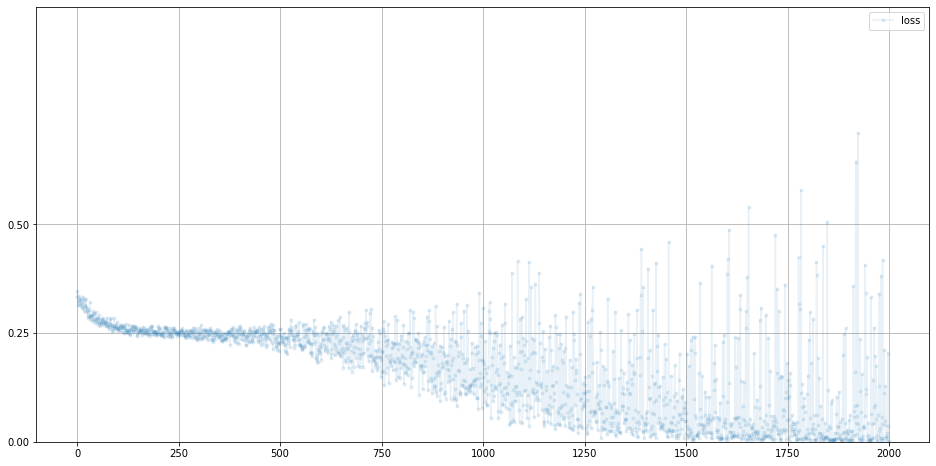

In [27]:
D.plot_progress()

In [28]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

0.7455981969833374
0.22302980720996857


지금까지는 실제 데이터에서 나오는 패턴과 가짜 데이터에서 나오는 패턴을 넣었을 때 결과가 다른지 확인하는 것이였다. 

### 생성기 만들기

생성기는 단순한 함수가 아니라 훈련을 필요로 하는 신경망이다. 현재 예제에서는 마지막 출력 레이어는 실제 데이터와 일치하도록 네 개의 노드가 필요하다.

히든 레이어의 크기는 정해진 것은 없지만 학습 시간을 길게 하지 않기 위해서는 큰 신경망은 지양하자. 생성기와 판별기가 학습의 균형을 이루기 위해서 많은 연구자들은 판별기를 복사해서 작업을 시작하곤 한다.

입력 레이어 노드는 한개, 은닉 레이어 노드는 3개, 출력 레이어 노드는 4개인 생성기로 시작해보자.(판별기와는 반대)

In [7]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        
        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.model(inputs)
        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        pass

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=["loss"])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker=".",
                grid=True, yticks=(0, 0.25, 0.5))
        pass

In [8]:
class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
        pass
    
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

생성기에는 loss가 없다 왜냐하면 이 과정이 필요가 없기 때문이다. GAN 훈련 반복문을 보면 손실함수는 오직 판별기의 결과에만 적용된다는 것을 볼 수 있다. **생성기는 판별기로부터 흘러온 기울기 오차를 통해 업데이트가 된다.**

In [52]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.3010, 0.6368, 0.5668, 0.6256], grad_fn=<SigmoidBackward>)

### GAN 훈련하기

In [56]:
%%time 

# create Discriminator and Generator

D = Discriminator()
G = Generator()

image_list = []

# train Discriminator and Generator

for i in range(10000):
    
    # train discriminator on true
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    # train discriminator on false
    # use detach() so gradients in G are not calculated
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    
    # train generator
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    
    # add image to list every 1000
    if (i % 1000 == 0):
      image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy() )

    pass

counter =  10000
counter =  20000
CPU times: user 12.7 s, sys: 18 ms, total: 12.7 s
Wall time: 12.7 s


새로운 판별기와 생성기 객체를 만든다. 

1단계에서는 판별기가 실제 데이터에 대해 훈련한다.

2단계에서는 생성기에서 비롯된 패턴을 통해 판별기를 학습시킨다. detach()는 생성기의 출력에 적용되어 계산 그래프에서 생성기를 떼어내는 역할을 한다. 

3단계에서는 생성기를 훈련하고 생성기의 입력값은 0.5로 설정한 후 판별기 객체에 전달하는 단계이다. 

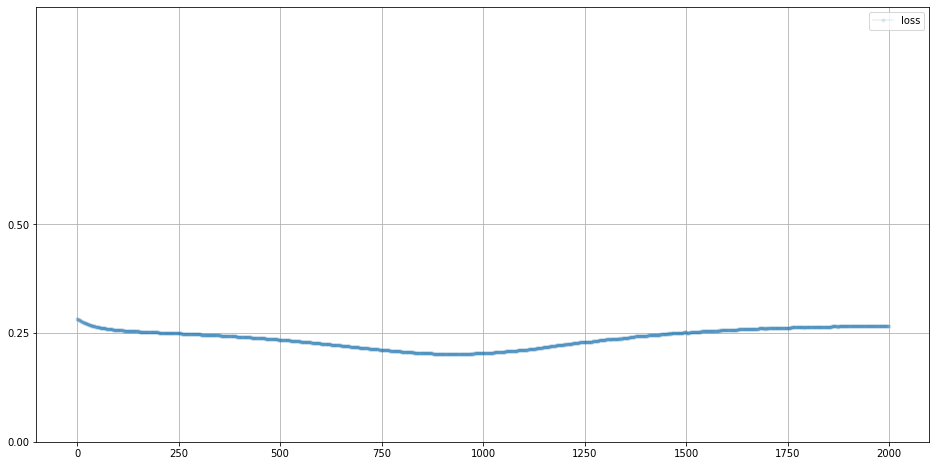

In [57]:
D.plot_progress()

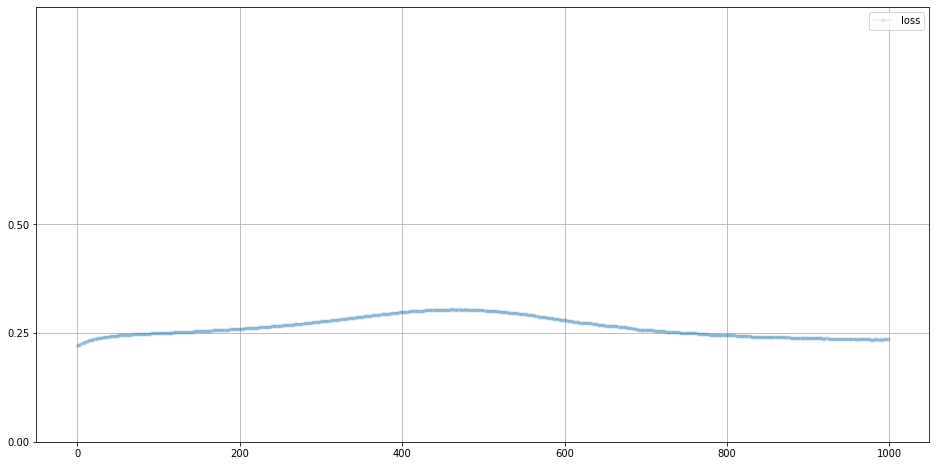

In [58]:
G.plot_progress()

In [59]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9052, 0.0533, 0.9516, 0.0485], grad_fn=<SigmoidBackward>)

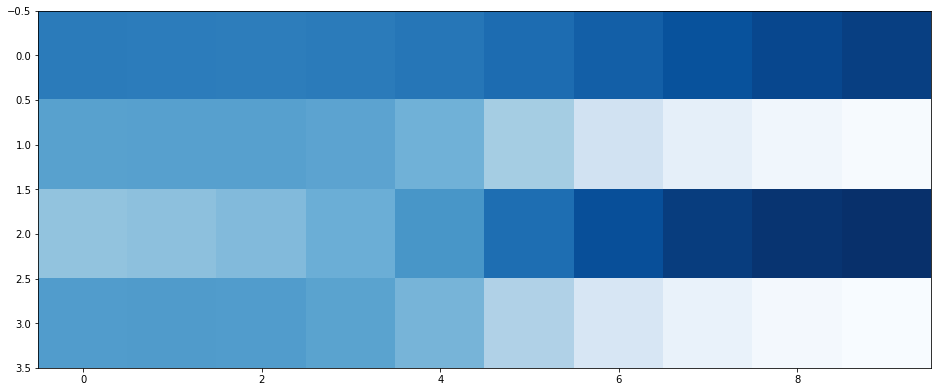

In [61]:
import numpy
plt.figure(figsize=(16, 8))
plt.imshow(numpy.array(image_list).T, interpolation="none", cmap='Blues')

생성기가 훈련 데이터를 직접 본 적이 없는데도 실제 데이터와 유사한 패턴을 만들어냈다.

### Summary

- GAN을 훈련하는 좋은 방법은 아래 단계에 맞춰 훈련하는 것이다.
    - 1. 실제 데이터셋을 미리 살펴본다.
    - 2. 판별기가 적어도 실제 데이터와 임의의 노이즈를 구별하도록 학습할 수 있을 성능은 지니는지 확인한다.
    - 3. 훈련되지 않은 생성기가 올바른 형태의 데이터를 만들어내는지 확인한다.
    - 4. 손실이 어떻게 변하는지 시각화한다.

- 잘 훈련된 GAN은 생성된 가짜 이미지와 실제 이미지를 잘 구별하지 못하는 상태이다. 즉 출력은 0.5로서 0.0 ~ 1.0의 중간에 해당하는 값이다. 평균제곱오차의 아상적인 값은 0.25이다. 

- 생성기와 판별기를 각각 따로 시각화하는 것은 유용하다. **생성기의 손실은 생성된 데이터로 부터 발생한 판별기의 손실이다.**

## Chapter 7 손으로 쓴 숫자 훈련

In [9]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import numpy, pandas, random
import matplotlib.pyplot as plt

### 데이터셋 클래스

In [10]:
class MnistDataset(Dataset):
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # 0 ~ 255의 이미지를 0 ~ 1로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0
        
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
        plt.title("label = " + str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation="none", cmap="Blues")
        pass
    
    pass

In [11]:
mnist_dataset = MnistDataset('./drive/MyDrive/workspace/GAN/GAN 첫걸음/mnist_data/mnist_train.csv')

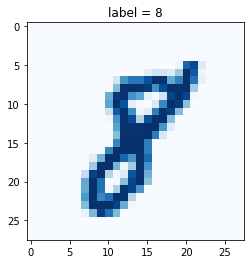

In [12]:
mnist_dataset.plot_image(17)

In [13]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

### MNIST 판별기

In [15]:
class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass


### 판별기 테스트하기

In [16]:
D = Discriminator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(generate_random(784), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000
counter =  30000


KeyboardInterrupt: ignored

In [ ]:
D.plot_progress()

In [ ]:
# 훈련된 판별기에 임의로 선택한 이미지를 수동으로 넣어 결과를 확인
for i in range(4):
    image_data_tensor = mnist_dataset[random.randint(0, 60000)][1]
    print(D.forward(image_data_tensor).item())
    pass

for i in range(4):
    print(D.forward(generate_random(784)).item())
    pass

### MNIST 생성기

생성기는 MNIST 데이터셋과 같은 형식으로 데이터를 만들어야 한다. 생성기가 생성한 이미지는 28 x 28 크기이며, 총 784개의 픽셀 값을 가져야한다.

판별기를 뒤집어놓은 형태부터 출발

- 출력: 784개 노드
- 히든 레이어: 200개 
- 입력 레이어: 1개


생성기는 훈련 데이터의 여러 양상을 다양하게 반영하도록 이미지를 생성해야한다.
실제 숫자로 보이는 이미지들을 생성해야 한다. 
신경망은 같은 입력에 대해 언제나 같은 출력을 낸다. 훈련 과정 자체에 어느 정도 임의적인 요소는 있을 수 있으나, 같은 입력값에 대해 항상 같은 출력을 낸다. 

이는 생성기의 입력으로 상수가 들어가면 안된다는 점을 뜻한다. 매 훈련 사이클마다 임의적인 입력을 사용하면 된다. **임의의 시드(random seed)**에서 숫자를 생성하여 입력으로 넣자!

이렇게 시드를 이용해서 생성기의 입력으로 넣어주면 입력이 조금씩 달라져 조금씩 다른 숫자가 다양한 이미지를 생성하는 데 도움을 준다고 볼 수 있다. 

In [17]:
class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 200),
            nn.Sigmoid(),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )
        
        # create optimiser, simple stochastic gradient descent
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
        pass
    
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator
        d_output = D.forward(g_output)
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

### 생성기 결과 확인하기

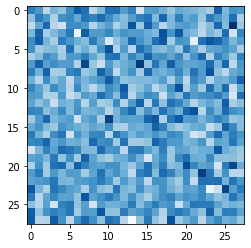

In [18]:
G = Generator()

output = G.forward(generate_random(1))

img = output.detach().numpy().reshape(28,28)

plt.imshow(img, interpolation='none', cmap='Blues')

### GAN 훈련하기

In [20]:
%%time 

D = Discriminator()
G = Generator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    D.train(G.forward(generate_random(1)).detach(), torch.FloatTensor([0.0]))
    G.train(D, generate_random(1), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
CPU times: user 3min 35s, sys: 2.46 s, total: 3min 37s
Wall time: 3min 37s


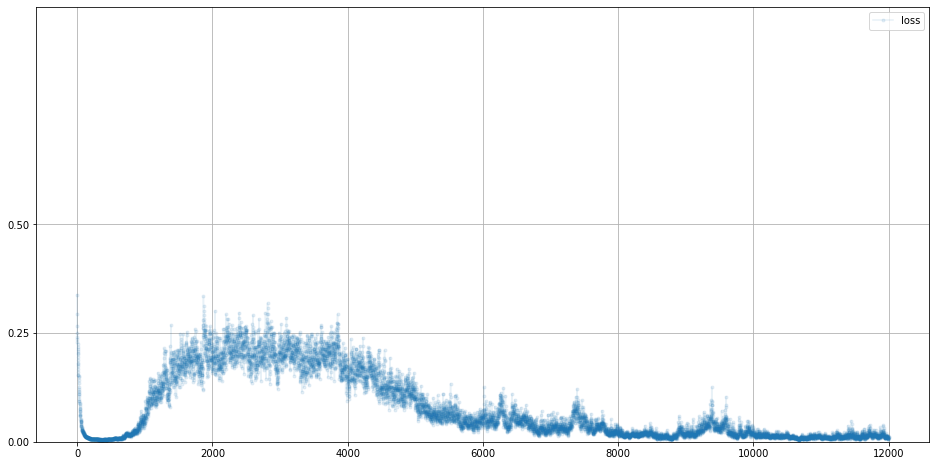

In [21]:
D.plot_progress()

Loss가 0.25 정도를 보이면 판별기와 생성기의 성능 균형이 맞는 상태이다. 

하지만 loss가 0에 가깝게 나온다면, 생성기의 성능이 떨어져 판별기를 속일 수 없는 상태이다.

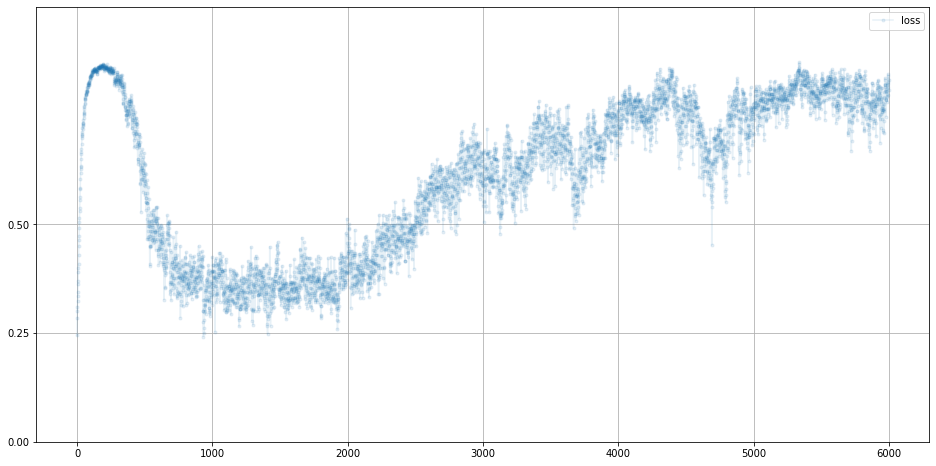

In [22]:
G.plot_progress()

초기 loss가 치솟는데 이는 판별기가 생성기가 생성한 이미지를 잘 구별하기 때문이다. 이후 loss는 0.25 근처로 하락하여 판별기와 생성기간 균형이 잘 맞는 상태가 된다. 그리고 중반 이후 다시 loss가 상승하는데, 이는 판별기의 성능이 생성기보다 좋은 구간이다.

생성기가 생성한 이미지를 살펴보자. 다른 임의의 시드에서 다른 이미지가 생성되므로, 여러장을 봐보자

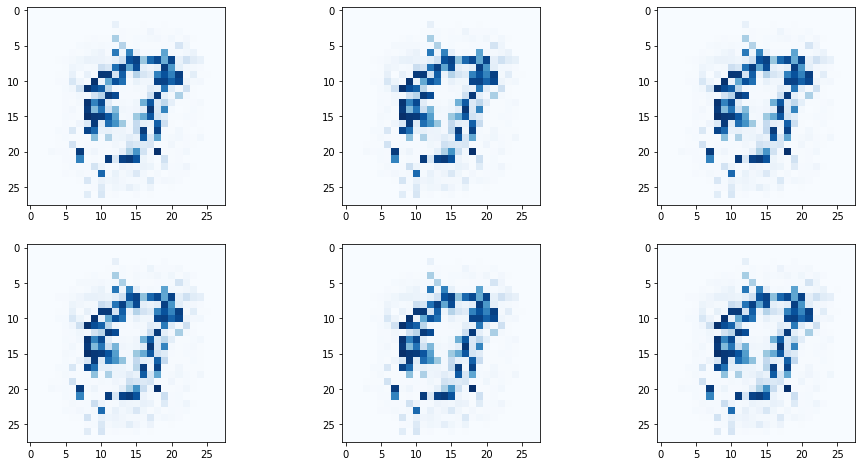

In [23]:
f, axarr = plt.subplots(2, 3, figsize=(16, 8))
for i in range(2):
    for j in range(3):
        output = G.forward(generate_random(1))
        img = output.detach().numpy().reshape(28, 28)
        axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
        pass
    pass

학습전 임의의 시드를 갖고 생성한 이미지는 어떠한 형태가 없는 임의의 노이즈였다. 하지만, 학습 후 생성기가 만든 이미지는 어떤 형태를 갖고 있다.

### 모드 붕괴 (Mode collapse)

위 생성된 이미지를 보면 모두 똑같이 생겼다.(차이는 눈으로 식별하기 힘들다.)

이 현상은 GAN을 훈련할 때 자주 맞닥뜨리는 **모드 붕괴(mode collapse)** 현상이다.

생성기가 다양하게 생성하는 것이 바람직 하지만 **모드 붕괴가 일어나면 생성기는 오직 하나만을 만들게 되거나, 선택지의 극히 일부만 만들게 된다.**

모드 붕괴가 일어나는 현상에 대한 명확하게 이해된 바는 없다. 하지만 그럴듯한 이론은 생성기가 판별기보다 더 앞서간 후에 항상 실제에 가깝게 결과가 나오는 '꿀 지점'을 발견하여 그 이미지를 계속 만들어내게 된다는 것이다. 따라서 이 현상은 완화하기 위해서 판별기를 생성기보다 좀 더 자주 훈련시키는 것이다. 하지만 이 방법은 실제 효과는 없다고 알려져 있다. 

훈련의 양보다 질이 중요하다. 손실이 높아지는 구간에서 학습이 안된다는 것을 시각화를 통해 알 수 있다.

### GAN 훈련 성능 향상하기